<a href="https://colab.research.google.com/github/amitoshacharya/Movie-Recommender-System/blob/main/Movie_Recommender_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***About Dataset***

    Context

The files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

    Content
This dataset consists of the following files:

***movies_metadata.csv:***

*The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.*

***keywords.csv:***

*Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.*

***credits.csv:***

*Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.*

***links.csv:***

*The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.*

***links_small.csv:***

*Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.*

***ratings_small.csv:***

*The subset of 100,000 ratings from 700 users on 9,000 movies.*

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here

    Acknowledgements
This dataset is an ensemble of data collected from TMDB and GroupLens.
The Movie Details, Credits and Keywords have been collected from the TMDB Open API. This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows.

The Movie Links and Ratings have been obtained from the Official GroupLens website. The files are a part of the dataset available here



    Inspiration
This dataset was assembled as part of my second Capstone Project for Springboard's Data Science Career Track. I wanted to perform an extensive EDA on Movie Data to narrate the history and the story of Cinema and use this metadata in combination with MovieLens ratings to build various types of Recommender Systems.



***Some of the things you can do with this dataset:***

Predicting movie revenue and/or movie success based on a certain metric. What movies tend to get higher vote counts and vote averages on TMDB? Building Content Based and Collaborative Filtering Based Recommendation Engines.

In [1]:
# importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings

warnings.filterwarnings("ignore")


In [2]:
####  preprocessing 1  ####
#read csv movies_metadata
df1= pd.read_csv(r'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Movie Recommender System/movies_metadata.csv')
df1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df1.shape #row count

(45466, 24)

In [4]:
df1[:1].T  #Transposing for an idea about 1st records

,0
adult,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [5]:
#reorganizing the table columns and eliminating 'original_title'
df2=df1[['id','imdb_id','title','original_language','spoken_languages','tagline','homepage','genres','overview','belongs_to_collection',
         'adult','budget','status','release_date','revenue','runtime','popularity','poster_path','production_companies',
         'production_countries','video','vote_average','vote_count']]
df2.head(3)

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,release_date,revenue,runtime,popularity,poster_path,production_companies,production_countries,video,vote_average,vote_count
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,1995-10-30,373554033.0,81.0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,NaN,...,1995-12-15,262797249.0,104.0,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0
2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",...,1995-12-22,0.0,101.0,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0


In [6]:
df2[:1].T  #Transposing for an idea about 1st records

,0
id,862
imdb_id,tt0114709
title,Toy Story
original_language,en
spoken_languages,"[{'iso_639_1': 'en', 'name': 'English'}]"
tagline,NaN
homepage,http://toystory.disney.com/toy-story
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
overview,"Led by Woody, Andy's toys live happily in his ..."
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."


In [7]:
#cleaning, converting the dict. to list
df2.count()

id                       45466
imdb_id                  45449
title                    45460
original_language        45455
spoken_languages         45460
tagline                  20412
homepage                  7782
genres                   45466
overview                 44512
belongs_to_collection     4494
adult                    45466
budget                   45466
status                   45379
release_date             45379
revenue                  45460
runtime                  45203
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [8]:
#total records
df2.shape

(45466, 23)

In [9]:
from ast import literal_eval #https://www.educative.io/answers/what-is-astliteralevalnodeorstring-in-python
df2.genres=df2['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]) #converting string to python list of genres

In [10]:
df2[:2]

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,release_date,revenue,runtime,popularity,poster_path,production_companies,production_countries,video,vote_average,vote_count
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,1995-10-30,373554033.0,81.0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,NaN,...,1995-12-15,262797249.0,104.0,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45466 non-null  object 
 1   imdb_id                45449 non-null  object 
 2   title                  45460 non-null  object 
 3   original_language      45455 non-null  object 
 4   spoken_languages       45460 non-null  object 
 5   tagline                20412 non-null  object 
 6   homepage               7782 non-null   object 
 7   genres                 45466 non-null  object 
 8   overview               44512 non-null  object 
 9   belongs_to_collection  4494 non-null   object 
 10  adult                  45466 non-null  object 
 11  budget                 45466 non-null  object 
 12  status                 45379 non-null  object 
 13  release_date           45379 non-null  object 
 14  revenue                45460 non-null  float64
 15  ru

In [12]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [13]:
df2['popularity'] = df2['popularity'].apply(clean_numeric).astype('float')

 # ***Rating for Top Movies filtering***

    Weighted Rating (WR) =  [v/(v+m)] X R + [m/(v+m)] X C

where,

v is the number of votes for the movie

m is the minimum votes required to be listed in the chart

R is the average rating of the movie

C is the mean vote across the whole report

The next step is to determine an appropriate value for ***m, the minimum votes required to be listed in the chart***.

We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

##Demographic Visualization

*Based on the popularity distribution, what movies are rated high*

In [14]:
def demographic_view(data,x:list,bar_color:list,sort_key='popularity'):
    df=data.copy()
    df.sort_values(by=sort_key, ascending=False, inplace=True)
    scaler=MinMaxScaler()
    plt.figure(figsize=(10,5), edgecolor='black')
    sns.set_color_codes("pastel")
    df[x]=scaler.fit_transform(df[x])

    for i,x_axis in enumerate(x):
        sns.barplot(y="title", x=x_axis, data=df,color=bar_color[i],label=x_axis, alpha=0.56)

    plt.legend()
    plt.show()

In [15]:
df3= df2[['title', 'genres', 'release_date', 'popularity', 'vote_average', 'vote_count']]
df3.head()

,title,genres,release_date,popularity,vote_average,vote_count
0,Toy Story,"[Animation, Comedy, Family]",1995-10-30,21.946943,7.7,5415.0
1,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,17.015539,6.9,2413.0
2,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,11.712900,6.5,92.0
3,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,3.859495,6.1,34.0
4,Father of the Bride Part II,[Comedy],1995-02-10,8.387519,5.7,173.0


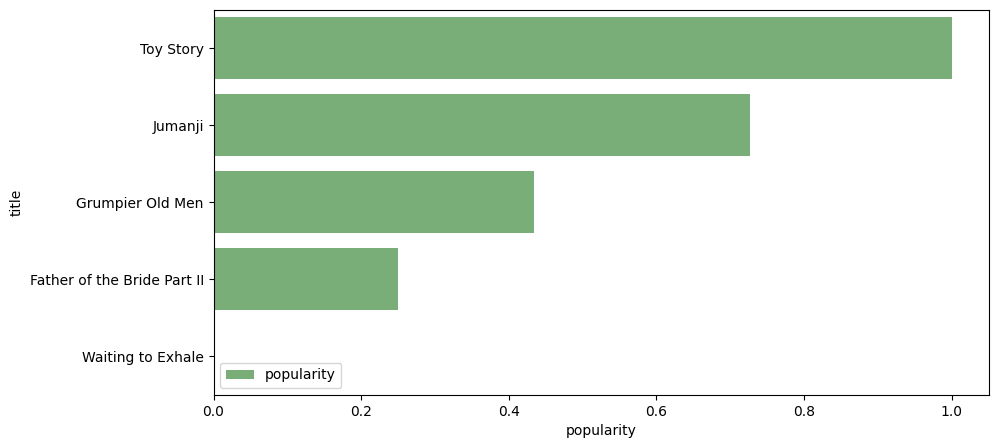

In [16]:
demographic_view(data=df3.head(),x=['popularity'],bar_color=['green'])

In [17]:
df3['year']= pd.to_datetime(df3.release_date, errors='coerce').apply(lambda x: str(x).split('-')[0])
df3.head()

,title,genres,release_date,popularity,vote_average,vote_count,year
0,Toy Story,"[Animation, Comedy, Family]",1995-10-30,21.946943,7.7,5415.0,1995
1,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,17.015539,6.9,2413.0,1995
2,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,11.712900,6.5,92.0,1995
3,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,3.859495,6.1,34.0,1995
4,Father of the Bride Part II,[Comedy],1995-02-10,8.387519,5.7,173.0,1995


In [18]:
df3.vote_count=df3[df3.vote_count.notnull()].vote_count.astype('int')
df3.vote_average=df3[df3.vote_average.notnull()].vote_average.astype('int')

In [19]:
#dataset level parameter
m= df3['vote_count'].quantile(0.95) #m is the minimum votes required to be listed in the chart. Here we are considering 95% of
C= df3['vote_average'].mean() #C is the mean vote across the whole report

m,C

(434.0, 5.244896612406511)

In [20]:
#Qualify for Top movies
qualified_movies= df3[(df3.vote_count >= m) & (df3.vote_count.notnull()) & df3.vote_average.notnull()].drop('release_date', axis=1)
qualified_movies.shape

(2274, 6)

###***Conclusion***
Therefore, to qualify to be considered for the chart, a movie has to have at least 434 votes counts.

We also see that the average rating for a movie is 5.244 on a scale of 10.

Thus, 2274 Movies qualify to be on our chart.

In [21]:
def wr(dataframe):
  v= dataframe['vote_count'] #v is the number of votes for the movie
  R= dataframe['vote_average'] #R is the average rating of the movie

  return ((v/(v+m)) * R) + (m/(v+m) * C)


In [22]:
qualified_movies['wr'] = qualified_movies.apply(wr, axis=1)
qualified_movies= qualified_movies.sort_values('wr', ascending=False).head(500)

#***TOP MOVIES Recommendations***

New user will be populated with the top movies list

In [23]:
qualified_movies.head(20)

,title,genres,popularity,vote_average,vote_count,year,wr
15480,Inception,"[Action, Thriller, Science Fiction, Mystery, A...",29.108149,8.0,14075.0,2010,7.917588
12481,The Dark Knight,"[Drama, Action, Crime, Thriller]",123.167259,8.0,12269.0,2008,7.905871
22879,Interstellar,"[Adventure, Drama, Science Fiction]",32.213481,8.0,11187.0,2014,7.897107
2843,Fight Club,[Drama],63.869599,8.0,9678.0,1999,7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]",32.070725,8.0,8892.0,2001,7.871787
292,Pulp Fiction,"[Thriller, Crime]",140.950236,8.0,8670.0,1994,7.868660
314,The Shawshank Redemption,"[Drama, Crime]",51.645403,8.0,8358.0,1994,7.864000
7000,The Lord of the Rings: The Return of the King,"[Adventure, Fantasy, Action]",29.324358,8.0,8226.0,2003,7.861927
351,Forrest Gump,"[Comedy, Drama, Romance]",48.307194,8.0,8147.0,1994,7.860656
5814,The Lord of the Rings: The Two Towers,"[Adventure, Fantasy, Action]",29.423537,8.0,7641.0,2002,7.851924


In [24]:
#segregating each movies with individual genres records
s = df3.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name= 'genres'
genres_df = df3.drop(['genres','release_date'], axis=1).join(s)
genres_df.head(10)

,title,popularity,vote_average,vote_count,year,genres
0,Toy Story,21.946943,7.0,5415.0,1995,Animation
0,Toy Story,21.946943,7.0,5415.0,1995,Comedy
0,Toy Story,21.946943,7.0,5415.0,1995,Family
1,Jumanji,17.015539,6.0,2413.0,1995,Adventure
1,Jumanji,17.015539,6.0,2413.0,1995,Fantasy
1,Jumanji,17.015539,6.0,2413.0,1995,Family
2,Grumpier Old Men,11.712900,6.0,92.0,1995,Romance
2,Grumpier Old Men,11.712900,6.0,92.0,1995,Comedy
3,Waiting to Exhale,3.859495,6.0,34.0,1995,Comedy
3,Waiting to Exhale,3.859495,6.0,34.0,1995,Drama


##***Top Genre Based Recommender***

In [25]:
#top movies based on genres
#for now we will use 85% as our cut-off value.
def top_movies(genre, hd, percentile=0.85):
  gen= genres_df[genres_df.genres == genre].copy()

  m= gen.vote_count.quantile(percentile)
  C= gen.vote_average.mean()

  qualified = gen[(gen.vote_count >= m) & gen.vote_count.notnull() & gen.vote_average.notnull()]

  v= qualified.vote_count
  R= qualified.vote_average

  wr= ((v/(v+m)) * R) + (m/(v+m) * C)

  qualified['wr'] = wr
  return qualified.sort_values('wr', ascending=False).head(hd)

In [26]:
#top 10 Romance movies
top_movies(genre='Romance', hd=10)

,title,popularity,vote_average,vote_count,year,genres,wr
10309,Dilwale Dulhania Le Jayenge,34.457024,9.0,661.0,1995,Romance,8.565285
351,Forrest Gump,48.307194,8.0,8147.0,1994,Romance,7.971357
876,Vertigo,18.208220,8.0,1162.0,1958,Romance,7.811667
40251,Your Name.,34.461252,8.0,1030.0,2016,Romance,7.789489
883,Some Like It Hot,11.845107,8.0,835.0,1959,Romance,7.745154
1132,Cinema Paradiso,14.177005,8.0,834.0,1988,Romance,7.744878
19901,Paperman,7.198633,8.0,734.0,2012,Romance,7.713951
37863,Sing Street,10.672862,8.0,669.0,2016,Romance,7.689483
882,The Apartment,11.994281,8.0,498.0,1960,Romance,7.599317
38718,The Handmaiden,16.727405,8.0,453.0,2016,Romance,7.566166


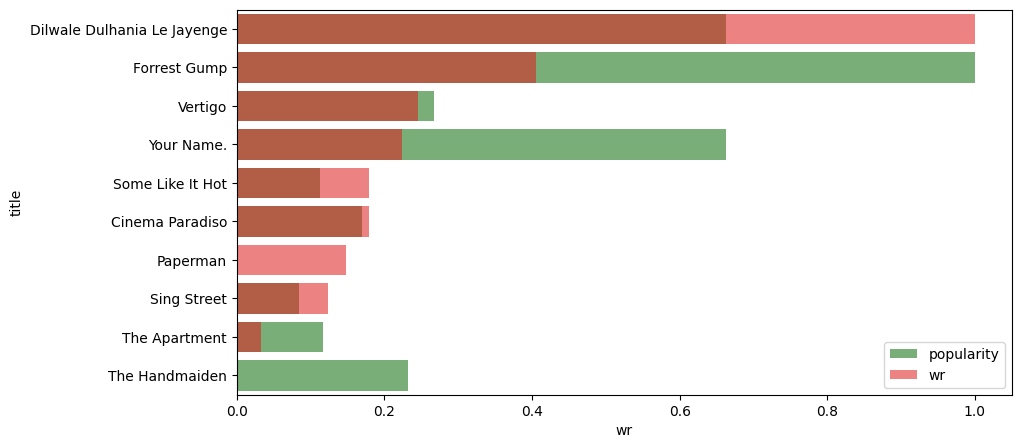

In [27]:
demographic_view(data=top_movies(genre='Romance', hd=10),x=['popularity','wr'],bar_color=['green','red'],sort_key='wr')

In [28]:
#top 10 Adventure movies
top_movies(genre='Adventure', hd=10)

,title,popularity,vote_average,vote_count,year,genres,wr
15480,Inception,29.108149,8.0,14075.0,2010,Adventure,7.906526
22879,Interstellar,32.213481,8.0,11187.0,2014,Adventure,7.883426
4863,The Lord of the Rings: The Fellowship of the Ring,32.070725,8.0,8892.0,2001,Adventure,7.854939
7000,The Lord of the Rings: The Return of the King,29.324358,8.0,8226.0,2003,Adventure,7.843867
5814,The Lord of the Rings: The Two Towers,29.423537,8.0,7641.0,2002,Adventure,7.832647
256,Star Wars,42.149697,8.0,6778.0,1977,Adventure,7.812801
1225,Back to the Future,25.778509,8.0,6239.0,1985,Adventure,7.797828
1154,The Empire Strikes Back,19.470959,8.0,5998.0,1980,Adventure,7.790329
5481,Spirited Away,41.048867,8.0,3968.0,2001,Adventure,7.695056
9698,Howl's Moving Castle,16.136048,8.0,2049.0,2004,Adventure,7.465435


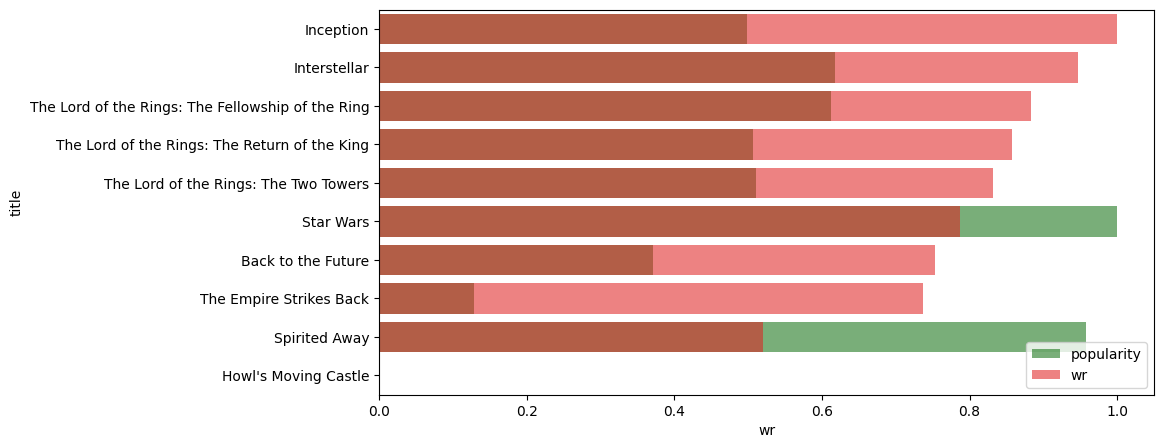

In [29]:
demographic_view(data=top_movies(genre='Adventure', hd=10),x=['popularity','wr'],bar_color=['green','red'],sort_key='wr')

####***Conclusion***
According to matrix the Top Romance movie is Bollywood's ***'Dilwale Dulhania Le Jayenge'***

whereas Top Adventure movie is Hollywood's ***'Inception'***

#***Content Based Recommendor (CBR)***

The recommender in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.

For instance, consider a person who loves Dilwale Dulhania Le Jayenge, My Name is Khan and Kabhi Khushi Kabhi Gham. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if s/he were to access the romance chart, s/he wouldn't find these as the top recommendations.

To personalise the recommendations more, we need to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as ***Content Based Filtering***.

I will build two Content Based Recommenders based on:

*   Movie Overviews and Taglines
*   Movie Cast, Crew, Keywords and Genre



In [30]:
links_sml=pd.read_csv(r'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Movie Recommender System/links_small.csv')
links_sml.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [31]:
links_sml=links_sml[links_sml.tmdbId.notnull()]['tmdbId'].astype('int')
links_sml.head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: tmdbId, dtype: int64

In [32]:
#EDA of metadata as md
md= df2.copy()
md=md.drop([19730, 29503, 35587])
md.id=md.id.astype('int')
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45463 non-null  int64  
 1   imdb_id                45446 non-null  object 
 2   title                  45460 non-null  object 
 3   original_language      45452 non-null  object 
 4   spoken_languages       45460 non-null  object 
 5   tagline                20412 non-null  object 
 6   homepage               7779 non-null   object 
 7   genres                 45463 non-null  object 
 8   overview               44509 non-null  object 
 9   belongs_to_collection  4491 non-null   object 
 10  adult                  45463 non-null  object 
 11  budget                 45463 non-null  object 
 12  status                 45379 non-null  object 
 13  release_date           45376 non-null  object 
 14  revenue                45460 non-null  float64
 15  ru

In [33]:
md.head()

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,release_date,revenue,runtime,popularity,poster_path,production_companies,production_countries,video,vote_average,vote_count
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,1995-10-30,373554033.0,81.0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,NaN,...,1995-12-15,262797249.0,104.0,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0
2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",...,1995-12-22,0.0,101.0,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0
3,31357,tt0114885,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,NaN,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",NaN,...,1995-12-22,81452156.0,127.0,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.1,34.0
4,11862,tt0113041,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,NaN,[Comedy],Just when George Banks has recovered from his ...,"{'id': 96871, 'name': 'Father of the Bride Col...",...,1995-02-10,76578911.0,106.0,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,5.7,173.0


In [34]:
#filtering small movies from our original metadata dataset
smd=md[md.id.isin(links_sml)]
smd.shape

(9099, 23)

###***Conclusion***

Therefore, 9099 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

In [35]:
#using small movies dataset for our further CBR
smd.head()

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,release_date,revenue,runtime,popularity,poster_path,production_companies,production_countries,video,vote_average,vote_count
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,1995-10-30,373554033.0,81.0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,NaN,...,1995-12-15,262797249.0,104.0,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0
2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",...,1995-12-22,0.0,101.0,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0
3,31357,tt0114885,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,NaN,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",NaN,...,1995-12-22,81452156.0,127.0,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.1,34.0
4,11862,tt0113041,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,NaN,[Comedy],Just when George Banks has recovered from his ...,"{'id': 96871, 'name': 'Father of the Bride Col...",...,1995-02-10,76578911.0,106.0,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,5.7,173.0


##***`Movie Description Based Recommendor`***

In [36]:
#create combinations of classification features- tagline and overview
smd['tagline'],smd['overview']= smd.tagline.fillna(''),smd.overview.fillna('')
smd['description']= smd.tagline + smd.overview
smd.decription=smd.description.fillna('')

smd.description

0        Led by Woody, Andy's toys live happily in his ...
1        Roll the dice and unleash the excitement!When ...
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
40224    A god incarnate. A city doomed.From the mind b...
40503    The band you know. The story you don't.The ban...
44821    Pokémon: Spell of the UnknownWhen Molly Hale's...
44826    All your favorite Pokémon characters are back,...
45265    While holidaying in the French Alps, a Swedish...
Name: description, Length: 9099, dtype: object

In [37]:
#vectors for CBR
from sklearn.feature_extraction.text import TfidfVectorizer as vctrizer
tfidfvectors= vctrizer(stop_words='english', ngram_range=(1, 2))
vectors= tfidfvectors.fit_transform(smd.description)

In [38]:
tfidfvectors.get_feature_names_out()

array(['00', '00 agent', '00 body', ..., 'ˈfil noun', 'ˌrän', 'ˌrän tō'],
      dtype=object)

In [39]:
#find the similarity b/w vectors using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim= cosine_similarity(vectors, vectors)
cos_sim_df= pd.DataFrame(data=cos_sim)
cos_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9089,9090,9091,9092,9093,9094,9095,9096,9097,9098
0,1.000000,0.006802,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.005668,0.000000,0.000000,0.000000,0.000000,0.004794,0.000000,0.003448,0.000000
1,0.006802,1.000000,0.015379,0.0,0.002249,0.014953,0.000000,0.000000,0.033264,0.0,...,0.000000,0.006688,0.000000,0.000000,0.000000,0.001754,0.003675,0.003568,0.007623,0.000000
2,0.000000,0.015379,1.000000,0.0,0.007934,0.000000,0.000000,0.002356,0.000000,0.0,...,0.000000,0.000000,0.000000,0.002318,0.001945,0.002223,0.000000,0.000000,0.002883,0.004737
3,0.000000,0.000000,0.000000,1.0,0.000000,0.002174,0.000000,0.006529,0.000000,0.0,...,0.016824,0.000000,0.003569,0.001991,0.000000,0.000000,0.000000,0.000000,0.008676,0.000000
4,0.000000,0.002249,0.007934,0.0,1.000000,0.000000,0.008296,0.000000,0.011431,0.0,...,0.000000,0.000000,0.006035,0.003366,0.000000,0.003822,0.001879,0.004378,0.001395,0.000000


***NOTE:***

***Here in the matrix, we are checking similarity b/w one description as index and others as columns***

In [40]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title']) #find index from title
indices[:10]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [41]:
def cbr_recommendor(title, top_n=5):
  idx= indices[title]

  sim_scores= list(enumerate(cos_sim_df[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1] #removing the first one

  movie_sim_idx=[tup[0] for tup in sim_scores]
  movie_sim=[[titles.iloc[tup[0]], tup[1]*100] for tup in sim_scores]

  return pd.DataFrame(data=movie_sim, columns=['Recommended movies similar to '+title, 'Similarity Score'], index=movie_sim_idx)


In [42]:
cbr_recommendor('Toy Story')

,Recommended movies similar to Toy Story,Similarity Score
2502,Toy Story 2,24.804050
7535,Toy Story 3,23.080578
6193,The 40 Year Old Virgin,10.628646
2547,Man on the Moon,10.163067
6627,Factory Girl,8.047870


In [43]:
cbr_recommendor('The Dark Knight',15)

,Recommended movies similar to The Dark Knight,Similarity Score
7931,The Dark Knight Rises,17.183830
132,Batman Forever,12.238593
1113,Batman Returns,10.085391
8227,"Batman: The Dark Knight Returns, Part 2",8.463275
7565,Batman: Under the Red Hood,8.413981
524,Batman,8.161776
7901,Batman: Year One,7.781253
2579,Batman: Mask of the Phantasm,6.961079
2696,JFK,6.155398
8165,"Batman: The Dark Knight Returns, Part 1",6.094795


### ***Conclusion:***

So, for ***The Dark Knight***, the system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations.

But unfortunately, that is all this system can do at the moment. This is not of much use to most user as it doesn't take into considerations very important features such as ***cast, crew, director and genre***, which determine the rating and the popularity of a movie. Someone who liked ***The Dark Knight*** probably likes it more because of Nolan and would hate Batman Forever and every other substandard movie in the Batman Franchise.

Therefore, we need more suggestive metadata than Overview and Tagline.

Now, we will build more sophisticated recommender that takes genre, keywords, cast and crew into consideration.

# ***Metadata Based Recommmendor (MBR)***

To build a standard metadata based content recommender, we need to merge our current dataset with the crew and the keyword datasets.

**Let us prepare this data as our first step.**

In [44]:
credits= pd.read_csv(r'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Movie Recommender System/credits.csv')
keywords= pd.read_csv(r'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Movie Recommender System/keywords.csv')

In [45]:
credits.head(1).T
'''
cast:
dict. of cast_id, character (in movie), credit_id, gender (2 for male, 1 for female), name (actor/ voice artist),
 order (index of dict.), profile path.

crew:
credit_id, department (Directing, Writing, Editing, Sound,... etc.), gender (2 for male, 1 for female), id (crew_id),
job (job in/for movie like, director, screenplay, etc), name (crew member name), profile path.

id: movie id
'''

'\ncast: \ndict. of cast_id, character (in movie), credit_id, gender (2 for male, 1 for female), name (actor/ voice artist),\n order (index of dict.), profile path.\n\ncrew: \ncredit_id, department (Directing, Writing, Editing, Sound,... etc.), gender (2 for male, 1 for female), id (crew_id), \njob (job in/for movie like, director, screenplay, etc), name (crew member name), profile path.\n\nid: movie id\n'

In [46]:
keywords.head(1).T
#movie based keywords.

,0
id,862
keywords,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [47]:
#Merging md, keywords and credits ON 'id'
md['id']= md.id.astype('int')
keywords['id']= keywords.id.astype('int')
credits['id']= credits.id.astype('int')

In [48]:
md.shape

(45463, 23)

In [49]:
#merging
md= md.merge(credits, on= 'id')
md= md.merge(keywords, on= 'id')
md.shape

(46628, 26)

In [50]:
smd = md[md.id.isin(links_sml)]
smd.shape

(9219, 26)

*Thus, 46628 reduced to 9219.*

*Much more compute efficient*

In [51]:
smd['year']=pd.to_datetime(smd.release_date, errors='coerce').apply(lambda x: str(x).split('-')[0])

In [52]:
smd.head(3)

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,poster_path,production_companies,production_countries,video,vote_average,vote_count,cast,crew,keywords,year
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,NaN,...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995
2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1995


    Now in our data--------------------

**Crew:**

From the crew, we will only pick the director as our feature since the others don't contribute that much to the feel of the movie.

**Cast:**

Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list.

In [53]:
#extracting cast (top 3), crew (only director), and keywords
smd['cast']= smd['cast'].apply(literal_eval).apply(lambda x: [cast['name'] for cast in x[:3]])
smd['crew']= smd['crew'].apply(literal_eval).apply(lambda x: [crew['name'] for crew in x if crew['job']=='Director'])
smd['crew']=smd['crew'].apply(lambda x: x*4) # NOTE: twiking a bit to give high priority to crew/directors

smd['keywords']= smd['keywords'].apply(literal_eval).apply(lambda x: [key['name'] for key in x])

In [54]:
smd.head()

,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,belongs_to_collection,...,poster_path,production_companies,production_countries,video,vote_average,vote_count,cast,crew,keywords,year
0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",...,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles]","[John Lasseter, John Lasseter, John Lasseter, ...","[jealousy, toy, boy, friendship, friends, riva...",1995
1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,NaN,...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Joe Johnston, Joe Johnston, Joe Johnston, Joe...","[board game, disappearance, based on children'...",1995
2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[Howard Deutch, Howard Deutch, Howard Deutch, ...","[fishing, best friend, duringcreditsstinger, o...",1995
3,31357,tt0114885,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,NaN,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",NaN,...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devine]","[Forest Whitaker, Forest Whitaker, Forest Whit...","[based on novel, interracial relationship, sin...",1995
4,11862,tt0113041,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,NaN,[Comedy],Just when George Banks has recovered from his ...,"{'id': 96871, 'name': 'Father of the Bride Col...",...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short]","[Charles Shyer, Charles Shyer, Charles Shyer, ...","[baby, midlife crisis, confidence, aging, daug...",1995


In [55]:
#removing white spaces from cast and crew
smd['cast']=smd['cast'].apply(lambda x: [cast.replace(' ','') for cast in x])
smd['crew']=smd['crew'].apply(lambda x: [crew.replace(' ','') for crew in x])

In [56]:
#keywords
#converting the following to vertical(stack) columns with index as keywords and droping the level 1 i.e column index
s = smd.apply(lambda x: pd.Series(x['keywords'], index=x['keywords']), axis=1).stack().reset_index(level=1, drop=True)
s.name='kywrd'

In [57]:
s=s.value_counts() #counting frequency
s[:10]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
violence                264
love                    222
sex                     219
musical                 219
suspense                212
Name: kywrd, dtype: int64

***Keywords*** occur in frequencies ranging from 1 to 610. We do not have any use for keywords that occur only once. Therefore, these can be safely removed.

Finally, we will convert every word to its stem so that words such as ***Dogs and Dog are considered the same***.

In [58]:
#Removed word occurrence less than 2
s=s[s>1]

In [59]:
#converting every word to its stem
from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer('english')
stemmer.stem('dogs') #example

'dog'

In [60]:
#coverting same keywords to single stem
smd['keywords']=smd['keywords'].apply(lambda x: [stemmer.stem(word) for word in x if word in s])
smd['keywords']= smd['keywords'].apply(lambda x: [word.replace(' ','').lower() for word in x])
smd['keywords']

0        [jealousi, toy, boy, friendship, friend, rival...
1        [boardgam, disappear, basedonchildren'sbook, n...
2                   [fish, bestfriend, duringcreditssting]
3        [basedonnovel, interracialrelationship, single...
4        [babi, midlifecrisi, confid, age, daughter, mo...
                               ...                        
40952                                         [friendship]
41172                                          [bollywood]
41225                                          [bollywood]
41391     [monster, godzilla, giantmonst, destruct, kaiju]
41669                                 [music, documentari]
Name: keywords, Length: 9219, dtype: object

In [61]:
smd['feature_classification']= smd.crew + smd.cast + smd.keywords + smd.genres
smd['feature_classification']= smd.feature_classification.apply(lambda x: ' '.join(x))

In [62]:
smd.feature_classification

0        JohnLasseter JohnLasseter JohnLasseter JohnLas...
1        JoeJohnston JoeJohnston JoeJohnston JoeJohnsto...
2        HowardDeutch HowardDeutch HowardDeutch HowardD...
3        ForestWhitaker ForestWhitaker ForestWhitaker F...
4        CharlesShyer CharlesShyer CharlesShyer Charles...
                               ...                        
40952    GreggChampion GreggChampion GreggChampion Greg...
41172    TinuSureshDesai TinuSureshDesai TinuSureshDesa...
41225    AshutoshGowariker AshutoshGowariker AshutoshGo...
41391    HideakiAnno ShinjiHiguchi HideakiAnno ShinjiHi...
41669    RonHoward RonHoward RonHoward RonHoward PaulMc...
Name: feature_classification, Length: 9219, dtype: object

*Now, we will vectorize and with the help of cosine similarity find recommendation movies based on* ***cast, crew, keywords and genres***

In [63]:
#vectorize the feature classification
vectors2= tfidfvectors.fit_transform(smd.feature_classification)

In [64]:
cos_sim2= cosine_similarity(vectors2, vectors2)
cos_sim_df= pd.DataFrame(data= cos_sim2)
cos_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218
0,1.000000,0.003309,0.001320,0.001265,0.001145,0.000000,0.001328,0.003841,0.000000,0.000000,...,0.0,0.000000,0.004426,0.00000,0.000884,0.007334,0.000000,0.000000,0.000000,0.0
1,0.003309,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007277,0.003052,0.002418,...,0.0,0.000000,0.006209,0.00000,0.000000,0.000000,0.000000,0.002957,0.002043,0.0
2,0.001320,0.000000,1.000000,0.003956,0.001332,0.000000,0.004153,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.001028,0.000000,0.002322,0.002434,0.000000,0.0
3,0.001265,0.000000,0.003956,1.000000,0.001277,0.000719,0.003981,0.001065,0.000000,0.000000,...,0.0,0.000792,0.000864,0.00068,0.000986,0.000975,0.002226,0.003295,0.000664,0.0
4,0.001145,0.000000,0.001332,0.001277,1.000000,0.000000,0.001340,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000892,0.000000,0.000000,0.000000,0.000000,0.0


In [65]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title']) #find index from title
smd

,index,id,imdb_id,title,original_language,spoken_languages,tagline,homepage,genres,overview,...,production_companies,production_countries,video,vote_average,vote_count,cast,crew,keywords,year,feature_classification
0,0,862,tt0114709,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,http://toystory.disney.com/toy-story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",...,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.7,5415.0,"[TomHanks, TimAllen, DonRickles]","[JohnLasseter, JohnLasseter, JohnLasseter, Joh...","[jealousi, toy, boy, friendship, friend, rival...",1995,JohnLasseter JohnLasseter JohnLasseter JohnLas...
1,1,8844,tt0113497,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,NaN,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.9,2413.0,"[RobinWilliams, JonathanHyde, KirstenDunst]","[JoeJohnston, JoeJohnston, JoeJohnston, JoeJoh...","[boardgam, disappear, basedonchildren'sbook, n...",1995,JoeJohnston JoeJohnston JoeJohnston JoeJohnsto...
2,2,15602,tt0113228,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,NaN,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.5,92.0,"[WalterMatthau, JackLemmon, Ann-Margret]","[HowardDeutch, HowardDeutch, HowardDeutch, How...","[fish, bestfriend, duringcreditssting]",1995,HowardDeutch HowardDeutch HowardDeutch HowardD...
3,3,31357,tt0114885,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,NaN,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",...,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",False,6.1,34.0,"[WhitneyHouston, AngelaBassett, LorettaDevine]","[ForestWhitaker, ForestWhitaker, ForestWhitake...","[basedonnovel, interracialrelationship, single...",1995,ForestWhitaker ForestWhitaker ForestWhitaker F...
4,4,11862,tt0113041,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,NaN,[Comedy],Just when George Banks has recovered from his ...,...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",False,5.7,173.0,"[SteveMartin, DianeKeaton, MartinShort]","[CharlesShyer, CharlesShyer, CharlesShyer, Cha...","[babi, midlifecrisi, confid, age, daughter, mo...",1995,CharlesShyer CharlesShyer CharlesShyer Charles...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,40952,159550,tt0255313,The Last Brickmaker in America,en,[],NaN,NaN,[Drama],A man must cope with the loss of his wife and ...,...,"[{'name': 'Nasser Entertainment', 'id': 35802}]","[{'iso_3166_1': 'US', 'name': 'United States o...",False,7.0,1.0,"[SidneyPoitier, WendyCrewson, JayO.Sanders]","[GreggChampion, GreggChampion, GreggChampion, ...",[friendship],2001,GreggChampion GreggChampion GreggChampion Greg...
9215,41172,392572,tt5165344,Rustom,hi,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Decorated Officer. Devoted Family Man. Defendi...,NaN,"[Thriller, Romance]","Rustom Pavri, an honourable officer of the Ind...",...,"[{'name': 'KriArj Entertainment', 'id': 91689}]","[{'iso_3166_1': 'IN', 'name': 'India'}]",False,7.3,25.0,"[AkshayKumar, IleanaD'Cruz, EshaGupta]","[TinuSureshDesai, TinuSureshDesai, TinuSureshD...",[bollywood],2016,TinuSureshDesai TinuSureshDesai TinuSureshDesa...
9216,41225,402672,tt3859980,Mohenjo Daro,hi,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",NaN,NaN,"[Adventure, Drama, History, Romance]","Village lad Sarm

In [66]:
indices['The Dark Knight']

6981

In [67]:
cbr_recommendor('The Dark Knight',15) # NOTE: for cbr_rcommendor smd, indices, and cos_sim_df is required

,Recommended movies similar to The Dark Knight,Similarity Score
8031,The Dark Knight Rises,49.540651
6218,Batman Begins,48.034923
6623,The Prestige,41.748438
2085,Following,39.154891
7648,Inception,39.110289
4145,Insomnia,38.406407
3381,Memento,36.409264
8613,Interstellar,29.870084
1134,Batman Returns,13.482333
7659,Batman: Under the Red Hood,11.826378


In [68]:
cbr_recommendor('The Godfather') # NOTE: for cbr_rcommendor smd, indices, and cos_sim_df is required

,Recommended movies similar to The Godfather,Similarity Score
3616,Tucker: The Man and His Dream,51.306872
1992,Peggy Sue Got Married,47.077791
3705,The Cotton Club,46.413371
4518,One from the Heart,45.975554
5867,Rumble Fish,45.667854


#### ***Conclusion:***

Thus, the recommendations seems to have recognized other Christopher Nolan movies (due to the high weightage given to director) and put them as top recommendations.

Thus, able to satisfy the users intrest to see fav. directors movies

#***Popularity and Ratings***

One thing to note that the recommendation system is that it recommends movies regardless of ratings and popularity. So, movies like ***Batman and Robin*** has a lot of similar characters as compared to ***The Dark Knight*** but it was a terrible movie that shouldn't be recommended to anyone.

Therefore, we need a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

So, based on similarity scores and calculate the vote of the 95th percentile movie. Then, using the value of  m to calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section fr top movies.

In [69]:
#improve in movie recommendor (cbr_recommendor) to new and better recommmendor
#i.e., including cast, crew, keywords and genres --> Movie Description based recommnedor

def movie_recommendor(title, top_n =10):
  idx= indices[title]

  sim_scores= list(enumerate(cos_sim_df[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:26] #removing the first one

  movie_sim_idx=[tup[0] for tup in sim_scores]

  movies_sim= smd.iloc[movie_sim_idx][['title', 'crew','cast', 'genres', 'year','vote_count', 'vote_average']]
  movies_sim['crew']= smd['crew'].apply(lambda x: list(set(x)))
  movies_sim['vote_count']= movies_sim[movies_sim.vote_count.notnull()]['vote_count'].astype('int')
  movies_sim['vote_average']= movies_sim[movies_sim.vote_average.notnull()]['vote_average'].astype('int')


  m= movies_sim.vote_count.quantile(0.60)
  C= movies_sim.vote_average.mean()

  qualified_movies= movies_sim[(movies_sim.vote_count>=m) & (movies_sim.vote_count.notnull()) & (movies_sim.vote_average.notnull())]

  v= qualified_movies.vote_count
  R= qualified_movies.vote_average
  wr= ((v/(v+m)) * R) + (m/(v+m) * C)

  qualified_movies['wr'] = wr
  return qualified_movies.sort_values('wr', ascending=False).head(top_n)


In [70]:
movie_recommendor('The Dark Knight')

,title,crew,cast,genres,year,vote_count,vote_average,wr
7648,Inception,[ChristopherNolan],"[LeonardoDiCaprio, JosephGordon-Levitt, EllenP...","[Action, Thriller, Science Fiction, Mystery, A...",2010,14075,8,7.789373
8613,Interstellar,[ChristopherNolan],"[MatthewMcConaughey, JessicaChastain, AnneHath...","[Adventure, Drama, Science Fiction]",2014,11187,8,7.743924
6623,The Prestige,[ChristopherNolan],"[HughJackman, ChristianBale, MichaelCaine]","[Drama, Mystery, Thriller]",2006,4510,8,7.488994
3381,Memento,[ChristopherNolan],"[GuyPearce, Carrie-AnneMoss, JoePantoliano]","[Mystery, Thriller]",2000,4168,8,7.461537
8031,The Dark Knight Rises,[ChristopherNolan],"[ChristianBale, MichaelCaine, GaryOldman]","[Action, Crime, Drama, Thriller]",2012,9263,7,6.892642
6218,Batman Begins,[ChristopherNolan],"[ChristianBale, MichaelCaine, LiamNeeson]","[Action, Crime, Drama]",2005,7511,7,6.873267
7583,Kick-Ass,[MatthewVaughn],"[AaronTaylor-Johnson, ChloëGraceMoretz, Christ...","[Action, Crime]",2010,4747,7,6.822823
8467,Kick-Ass 2,[JeffWadlow],"[AaronTaylor-Johnson, ChloëGraceMoretz, Christ...","[Action, Adventure, Crime]",2013,2275,6,6.216163
8419,Man of Steel,[ZackSnyder],"[HenryCavill, AmyAdams, MichaelShannon]","[Action, Adventure, Fantasy, Science Fiction]",2013,6462,6,6.111639
9024,Batman v Superman: Dawn of Justice,[ZackSnyder],"[BenAffleck, HenryCavill, GalGadot]","[Action, Adventure, Fantasy]",2016,7189,5,5.337064


#### ***NOTE:***

Things that can improve the recommendor:

*   Range of sim_scores to be consider
*   m i.e., minimum value for vote count to be consider
*   keywords: increase the frequency of occurrence (here, more than 1 is taken)






#### ***Conclusion:***

The Recommendor on movies ranges till top 26 with 65th percentile in vote_count and contain similar keywords more than once is giving user desired result of movies directed by ***Christopher Nolan***.

# ***Collaborative Filtering (CBF)***

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

Therefore, in this section, we will use a technique called **Collaborative Filtering** to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

Now, we will use Singular Value Decomposition (SVD) and K-Nearest Neighbours (KNN) which are very powerful Algorithms present in Surpise lib as well as scikitLearn (not use bcz of no predict fuction) to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [71]:
#read ratings for users from ratings_small as contain less records which is benifitial for computation
us_ratings= pd.read_csv(r'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Movie Recommender System/ratings_small.csv')
us_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [72]:
us_ratings.shape

(100004, 4)

In [73]:
! pip install numpy
! pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095472 sha256=67a7ae77f1e28fe5d3f65da40917664012a81f7815e950844552b5c3f804d99b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [74]:
#Simple Python RecommendatIon System Engine (SURPRISE)
from surprise import Reader, SVD, KNNWithMeans, Dataset

data= Dataset.load_from_df(us_ratings[['userId', 'movieId', 'rating']], Reader())

In [75]:
'''
SVD
    n_epochs – The number of iteration of the SGD procedure. Default is 20.
    lr_all – The learning rate for all parameters. Default is 0.005.
    reg_all – The regularization term for all parameters. Default is 0.02.

KNN

'''
from surprise.model_selection import cross_validate

algo=SVD(random_state=40)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8918  0.8897  0.8968  0.9001  0.8986  0.8954  0.0040  
MAE (testset)     0.6883  0.6866  0.6900  0.6898  0.6937  0.6897  0.0023  
Fit time          2.00    2.62    1.83    3.20    3.69    2.67    0.70    
Test time         0.25    0.18    0.27    0.34    0.80    0.37    0.22    


{'test_rmse': array([0.89177883, 0.88971618, 0.89684274, 0.90013562, 0.89862099]),
 'test_mae': array([0.68830331, 0.68661905, 0.68996953, 0.68981789, 0.69366996]),
 'fit_time': (2.0005197525024414,
  2.6183743476867676,
  1.8303899765014648,
  3.20011043548584,
  3.6922576427459717),
 'test_time': (0.24724936485290527,
  0.1762707233428955,
  0.26744675636291504,
  0.3448026180267334,
  0.8018038272857666)}

We get a mean Root Mean Sqaure Error of 0.8968 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [76]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [77]:
us_ratings[us_ratings['movieId'] == 300]

,userId,movieId,rating,timestamp
50,2,300,3.0,835355532
1038,15,300,4.0,1054449869
3193,19,300,3.0,855193220
4043,23,300,4.0,1149868544
5097,30,300,5.0,945122065
...,...,...,...,...
96205,641,300,4.0,834636572
96610,647,300,5.0,947292218
98451,659,300,5.0,834598140
98679,662,300,3.0,839022324


In [78]:
algo.predict(uid=1, iid= 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.9865519836420185, details={'was_impossible': False})

***`Conclusion:`***

For movie with ID 302, we get an estimated prediction of **2.759**. (This will affect due to random_state in algo, uid i.e., userId, iid i.e., itemId (here, movieId)

One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains).

It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.